In [2]:
import pandas as pd
import numpy as np
import math as math
from matplotlib import pyplot as plt
from IPython.display import display, Math, HTML
import scipy.optimize as op
from pylab import *
from tabulate import tabulate

## **Torre de Absorción**
En un bio-proceso, la melaza es fermentada para producir un licor que contiene etanol. Un vapor richo es dióxido de carbono con una pequeña cantidad de etanol es liberado. El etanol es recuperado por absorción en una torre de platos.
Las condiciones son:
* Entrada a 110 kPa y 30°C
 * *Etanol*: 2 %
   * Donde se absorbe el 97% de la etanol presente en el efluente.
 * *Vapor*: 180 kmol/h
 * *Líquido*: 146.2 kmol/h


- Entrada de alcohol en la corriente de gas: 3.600. kgmol alcohol/h
- Entrada de alcohol en la corriente gaseosa: 176.400. kgmol CO2/h
- Salida de alcohol en la corriente gaseosa: 0.108. kgmol alcohol/h
- Salida de alcohol en la corriente líquida: 3.492. kgmol alcohol/h
- Corriente de salida del gas: 176.508. kgmol CO2 + alcohol/h
- Fracción mol de alcohol en la salida del gas: 0.000612.
- Corriente de salida del líquido: 149.692. kgmol agua + alcohol/h
- Fracción mol de alcohol en la salida del líquido: 0.023328.

        Yeq             Yop      
     0.000000        0.000612 
     0.001781        0.003211 
     0.003562        0.005810 
     0.005344        0.008408 
     0.007125        0.011007 
     0.008906        0.013606 
     0.010688        0.016205 
     0.012469        0.018804 
     0.014250        0.021402 

Etapas de equilibrio, punto por punto
     Xplatos         Yplatos      
    0.0000000       0.0006119 
    0.0010735       0.0006119 
    0.0010735       0.0015046 

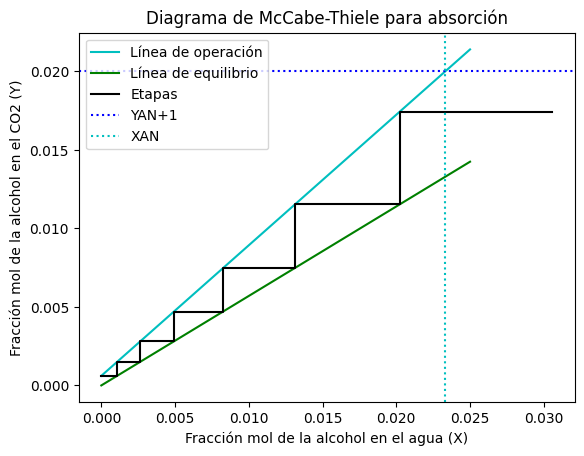

Pendiente de la recta de operación: 0.832.
Pendiente de la recta de equilibrio: 0.570.


In [9]:
T = 313.15                      #Temperatura del proceso (K)
H = 0.57                      #Constante de Henry
NoAbs = 0.03                 #Porcentaje de alcohol que no se absorbe
Abs = 0.97                   #Porcentaje de alcohol que sí se absorbe
YAN1 = 0.02                  #Fracción mol de alcohol en el de Entrada
XA0 = 0                      #Fracción mol de alcohol en el agua de Entrada
VN1 = 180                     #Corriente de Entrada (kmol/h)
L0 = 146.2                      #Corriente de Entrada  (kgmol/h)

YAN1_E = YAN1*VN1
print ('- Entrada de alcohol en la corriente de gas: %5.3f.' %YAN1_E, "kgmol alcohol/h")
AiN1_E = (1-YAN1)*VN1
print ('- Entrada de alcohol en la corriente gaseosa: %5.3f.' %AiN1_E, "kgmol CO2/h")
YA_S = NoAbs*YAN1_E
print ('- Salida de alcohol en la corriente gaseosa: %5.3f.' %YA_S, "kgmol alcohol/h")
XAN_S = Abs*YAN1_E
print ('- Salida de alcohol en la corriente líquida: %5.3f.' %XAN_S, "kgmol alcohol/h")
V1_S = YA_S + AiN1_E
print ('- Corriente de salida del gas: %5.3f.' %V1_S, "kgmol CO2 + alcohol/h")
YA1 = YA_S / V1_S
print ('- Fracción mol de alcohol en la salida del gas: %5.6f.' %YA1)
LN = L0 + XAN_S
print ('- Corriente de salida del líquido: %5.3f.' %LN, "kgmol agua + alcohol/h")
XAN = XAN_S / LN
print ('- Fracción mol de alcohol en la salida del líquido: %5.6f.' %XAN)
print("")

x = np.linspace(0, 0.025, 9)      # 0.0050(1% H=2),   0.00359(1% H=2.8),   0.0250(5% H=2),   0.0180(5% H=2.8)    EJEMPLO DEL LIBRO 1% H=2.53 (0.004)
n = len(x)
Ye = np.zeros(n)
Yo = np.zeros(n)
mo = LN / VN1                       #Pendiente de la línea de operación
print('        Yeq             Yop      ')
for i in range (n):
    Ye[i] = H*x[i]                  #Ecuación de la recta de equilibrio (La ec. se simplifa ya que la presión de trabajo es 1 atm)
    Yo[i] = mo*x[i] + YA1           #Ecuación de la recta de operación (La ec. se simplifica ya que la concentración de soluto en el líquido de entrada es cero)
    print ('%13.6f %15.6f ' %(Ye[i],Yo[i]))

#Calculo analítico de las etapas de equilibrio necesarias para la absorción
YP = [YA1]
XP = [0]
i = 0
yp = 0
print ("")
print ("Etapas de equilibrio, punto por punto")
print('     Xplatos         Yplatos      ')
while yp < YAN1 : #Este ciclo permite asignar los valores de "X" y "Y" para los escalones que se construyen entre las líneas de operación y equilibrio
    xp = YP[i] / H # A partir de un valor inicial de "Y" se sustituye en la ecuación de equilibrio
    XP.append(xp)
    yp = mo*XP[i] + YA1 #La fracción en líquido asignada en la ecuación de equilibrio se sustituye en la línea de operación para dar un nuevo valor de "Y" para asignar cuando se reinicia el ciclo
    YP.append(yp)
    print ('%13.7f %15.7f ' % (XP[i],YP[i]))
    i += 1
print ("i =", i)

NE = i / 2
print ("Para saber las etapas de equilibrio analíticamente, se cuentan los puntos antes de que Y=YN1 y se dividen entre dos, en este caso el número de puntos es igual a i (i =",i,"), por lo tanto NoPuntos = ",i,". Si el i >",i,", los escalones de la gráfica pasarían la línea de LN+1 (línea punteada azul), de esta manera también se podría observar que el número de platos es mayor al necesario.")
print ("Por lo tanto el número de etapas de equilirbio es:", NE)

#EL while da un punto inecesario, SOLO PARA GRAFICAR se obtienen 2 nuevos vectores sin tomar en cuenta el último punto
XE = XP [0:i]
YO = YP [0:i]

#Diagrama McCabe-Thiele
plt.title('Diagrama de McCabe-Thiele para absorción')
plt.xlabel('Fracción mol de la alcohol en el agua (X)')
plt.ylabel('Fracción mol de la alcohol en el CO2 (Y)')
plt.plot(x, Yo, '-', color='c', label = 'Línea de operación')
plt.plot(x, Ye, '-', color='g', label = 'Línea de equilibrio')
plt.plot(XE, YO, '-', color='k', label = 'Etapas')
axhline(YAN1, color='b', ls="dotted", label = 'YAN+1')
axvline(XAN, color='c', ls="dotted", label = 'XAN')
plt.legend()
plt.show()
print ('Pendiente de la recta de operación: %5.3f.' %mo)
print ('Pendiente de la recta de equilibrio: %5.3f.' %H)